<a href="https://colab.research.google.com/github/suryagokul/Deep-Learning/blob/main/Regression_Using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [132]:
from sklearn.datasets import fetch_california_housing

from sklearn.preprocessing import StandardScaler

import pandas as pd


In [89]:
df = fetch_california_housing()

In [90]:
df.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [91]:
X = df.data

In [92]:
X[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [93]:
X.shape[1]

8

In [94]:
y = df.target

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [97]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [101]:
X_valid = scaler.transform(X_valid)

In [98]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

In [104]:
model = tf.keras.models.Sequential()

model.add(Dense(30,activation=tf.nn.relu,input_shape=X_train.shape[1:]))
model.add(Dense(20,activation=tf.nn.relu))
model.add(Dense(5,activation=tf.nn.relu))
model.add(Dense(1))

model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.mean_squared_error)

In [134]:
fit_model = model.fit(X_train,y_train,epochs=20,validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3068 - val_loss: 1.4553
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3102 - val_loss: 0.4593
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3032 - val_loss: 1.2621
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3105 - val_loss: 0.4965
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3020 - val_loss: 0.3029
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2993 - val_loss: 0.2923
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2968 - val_loss: 0.2827
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2956 - val_loss: 0.2873
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2944 - val_loss: 0.3076
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.2911 - val_loss: 0.3333

In [128]:
print(X_test[50].shape)                 # It give error while prediction.

print(X_test[50:51].shape)      # So we have to give as slices or we can resize to (1,8)

(8,)
(1, 8)


In [125]:
ypred = model.predict(X_test[50:51])

ypred

array([[2.4482899]], dtype=float32)

In [110]:
y_test[50]

2.519

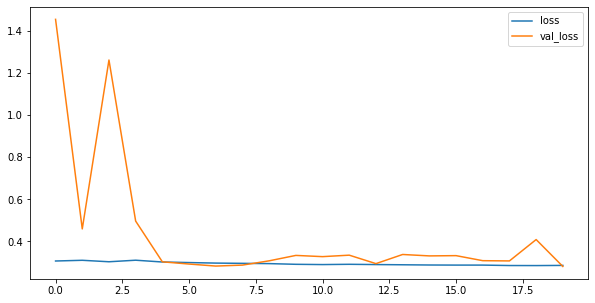

In [137]:
pd.DataFrame(fit_model.history).plot(figsize=(10,5))

In [138]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 1ms/step - loss: 0.2884


0.2884170413017273

`ModelCheckpoint callback is used in conjunction with training using model. fit() to save a model or weights (in a checkpoint file) at some interval, so the model or weights can be loaded later to continue the training from the state saved.`

`By Checkpoints we can access models at different intervals..`

In [152]:
chp = tf.keras.callbacks.ModelCheckpoint('Checkpoints.h5',save_best_only=True)

fitting = model.fit(X_train,y_train,epochs=5,validation_data= (X_valid,y_valid),callbacks=[chp])

Epoch 1/5
363/363 [==============================] - 1s 1ms/step - loss: 0.2783 - val_loss: 0.3397
Epoch 2/5
363/363 [==============================] - 1s 1ms/step - loss: 0.2776 - val_loss: 0.3118
Epoch 3/5
363/363 [==============================] - 1s 1ms/step - loss: 0.2789 - val_loss: 0.2786
Epoch 4/5
363/363 [==============================] - 1s 1ms/step - loss: 0.2763 - val_loss: 0.3040
Epoch 5/5
363/363 [==============================] - 0s 1ms/step - loss: 0.2765 - val_loss: 0.2815


In [153]:
model = tf.keras.models.load_model("/content/Checkpoints.h5")            # rollback to best model

In [154]:
model.evaluate(X_test,y_test)

162/162 [==============================] - 0s 899us/step - loss: 0.2878


0.2878279685974121